In [1]:
# !pip install augraphy

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


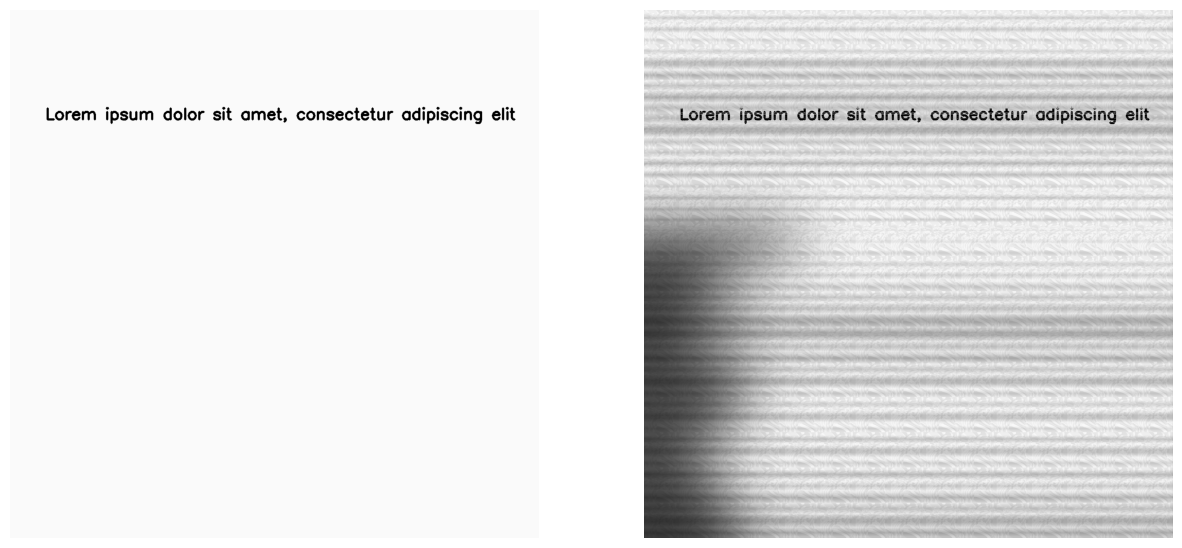

In [3]:
from augraphy import *

pipeline = default_augraphy_pipeline()
image = cv.imread("image.png")
image_augmented = pipeline(image)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_augmented)
plt.axis("off")

plt.show()

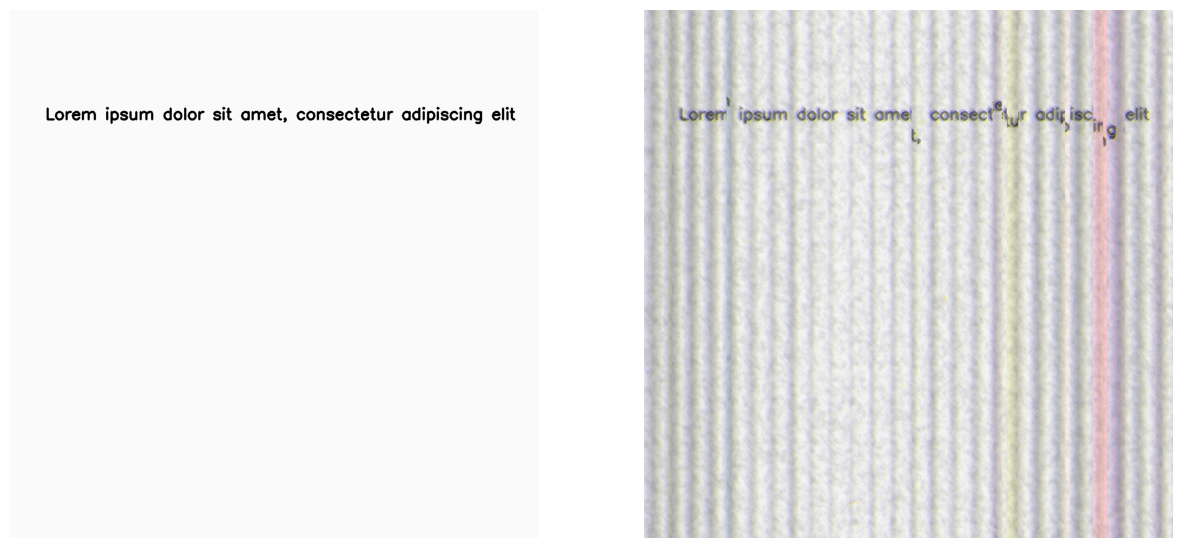

In [4]:
from augraphy import *
import random

ink_phase = [
    InkBleed(
        intensity_range=(0.5, 0.6),
        kernel_size=random.choice([(5, 5), (3, 3)]),
        severity=(0.2, 0.4),
        p=0.33,
    ),
    OneOf(
        [
            InkShifter(
                text_shift_scale_range=(18, 27),
                text_shift_factor_range=(1, 4),
                text_fade_range=(0, 2),
                blur_kernel_size=(5, 5),
                blur_sigma=0,
                noise_type="random",
            ),
            BleedThrough(
                intensity_range=(0.1, 0.3),
                color_range=(32, 224),
                ksize=(17, 17),
                sigmaX=1,
                alpha=random.uniform(0.1, 0.2),
                offsets=(10, 20),
            ),
        ],
        p=1.0,
    ),
]

paper_phase = [
    ColorPaper(
        hue_range=(0, 255),
        saturation_range=(10, 40),
        p=0.33,
    ),
    OneOf(
        [
            DelaunayTessellation(
                n_points_range=(500, 800),
                n_horizontal_points_range=(500, 800),
                n_vertical_points_range=(500, 800),
                noise_type="random",
                color_list="default",
                color_list_alternate="default",
            ),
            PatternGenerator(
                imgx=random.randint(256, 512),
                imgy=random.randint(256, 512),
                n_rotation_range=(10, 15),
                color="random",
                alpha_range=(0.25, 0.5),
            ),
            VoronoiTessellation(
                mult_range=(50, 80),
                seed=19829813472,
                num_cells_range=(500, 1000),
                noise_type="random",
                background_value=(200, 255),
            ),
        ],
        p=1.0,
    ),
    AugmentationSequence(
        [
            NoiseTexturize(
                sigma_range=(3, 10),
                turbulence_range=(2, 5),
            ),
            BrightnessTexturize(
                texturize_range=(0.9, 0.99),
                deviation=0.03,
            ),
        ],
    ),
]

post_phase = [
    OneOf(
        [
            DirtyDrum(
                line_width_range=(1, 6),
                line_concentration=random.uniform(0.05, 0.15),
                direction=random.randint(0, 2),
                noise_intensity=random.uniform(0.6, 0.95),
                noise_value=(64, 224),
                ksize=random.choice([(3, 3), (5, 5), (7, 7)]),
                sigmaX=0,
                p=0.2,
            ),
            DirtyRollers(
                line_width_range=(2, 32),
                scanline_type=0,
            ),
        ],
        p=1.0,
    ),
    SubtleNoise(
        subtle_range=random.randint(5, 10),
        p=0.33,
    ),
    Jpeg(
        quality_range=(25, 95),
        p=0.33,
    ),
    OneOf(
        [
            Markup(
                num_lines_range=(2, 7),
                markup_length_range=(0.5, 1),
                markup_thickness_range=(1, 2),
                markup_type=random.choice(
                    ["strikethrough", "crossed", "highlight", "underline"]
                ),
                markup_color="random",
                single_word_mode=False,
                repetitions=1,
            ),
            Scribbles(
                scribbles_type="random",
                scribbles_location="random",
                scribbles_size_range=(250, 600),
                scribbles_count_range=(1, 6),
                scribbles_thickness_range=(1, 3),
                scribbles_brightness_change=[32, 64, 128],
                scribbles_text="random",
                scribbles_text_font="random",
                scribbles_text_rotate_range=(0, 360),
                scribbles_lines_stroke_count_range=(1, 6),
            ),
        ],
        p=1.0,
    ),
    OneOf(
        [
            GlitchEffect(
                glitch_direction="random",
                glitch_number_range=(8, 16),
                glitch_size_range=(5, 50),
                glitch_offset_range=(10, 50),
            ),
            ColorShift(
                color_shift_offset_x_range=(3, 5),
                color_shift_offset_y_range=(3, 5),
                color_shift_iterations=(2, 3),
                color_shift_brightness_range=(0.9, 1.1),
                color_shift_gaussian_kernel_range=(3, 3),
            ),
        ],
        p=1.0,
    ),
    BadPhotoCopy(
        # noise_mask=None,
        noise_type=-1,
        noise_side="random",
        noise_iteration=(1, 2),
        noise_size=(1, 3),
        noise_value=(128, 196),
        noise_sparsity=(0.3, 0.6),
        noise_concentration=(0.1, 0.6),
        blur_noise=random.choice([True, False]),
        blur_noise_kernel=random.choice([(3, 3), (5, 5), (7, 7)]),
        wave_pattern=random.choice([True, False]),
        edge_effect=random.choice([True, False]),
        p=0.33,
    ),
    Faxify(
        scale_range=(0.3, 0.6),
        monochrome=random.choice([0, 1]),
        monochrome_method="random",
        monochrome_arguments={},
        halftone=random.choice([0, 1]),
        invert=1,
        half_kernel_size=random.choice([(1, 1), (2, 2)]),
        angle=(0, 360),
        sigma=(1, 3),
        p=0.33,
    ),
]

pipeline = AugraphyPipeline(
    ink_phase=ink_phase, paper_phase=paper_phase, post_phase=post_phase
)

image = cv.imread("image.png")

image_augmented = pipeline(image)
cv.imwrite("image_augmented.png", image_augmented)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_augmented)
plt.axis("off")

plt.show()